In [15]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [34]:
data = pd.read_csv('/Users/zex/Desktop/pokemon_dataset_analysis/pokemon-dataset/pokemon.csv')
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [4]:
#tüm kolonların istatistiksel değerlerini verir

data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<AxesSubplot:title={'center':'Attack'}, xlabel='Generation'>

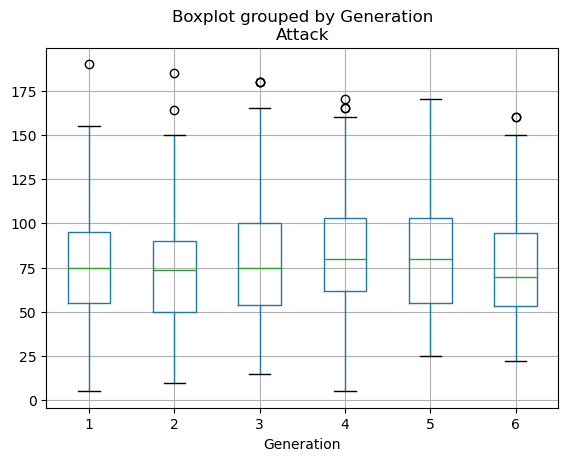

In [5]:
#istenilen kolonlardaki değerlerin boxplot ile istatistiksel veriler çerçevesinde görselleştirilmesini sağlar

data.boxplot(column='Attack', by='Generation')

In [33]:
#seaborn üzerinde görselleştirme yapabilmeyi kolaylaştırmak için melt() metodunu kullanırız

melted = pd.melt(data.head(3), id_vars= ['Name'], value_vars= ['Attack', 'Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Bulbasaur,Defense,49
4,Ivysaur,Defense,63
5,Venusaur,Defense,83


In [32]:
#melt() metodunun tersidir. pivot() ile melt edilmiş dataseti eski haline döndürebiliriz

pivoted = melted.pivot(index= ['Name'], columns= ['variable'], values= ['value'])
pivoted

value        
variable  Attack Defense
Name                    
Bulbasaur     49      49
Ivysaur       62      63
Venusaur      82      83

In [31]:
#iki dataframe i birleştirmeye yarar

data1= data.head(5)
data2= data.tail(5)

conc_data= pd.concat([data1, data2], axis= 0, ignore_index= True) #axis= 0 yaparsak alt alta birleştirir
conc_data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


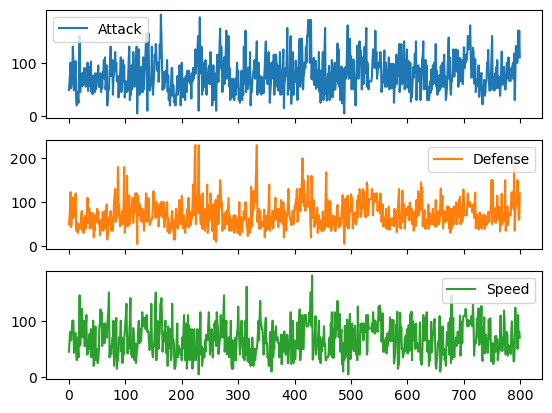

In [19]:
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot(subplots = True)
plt.show()

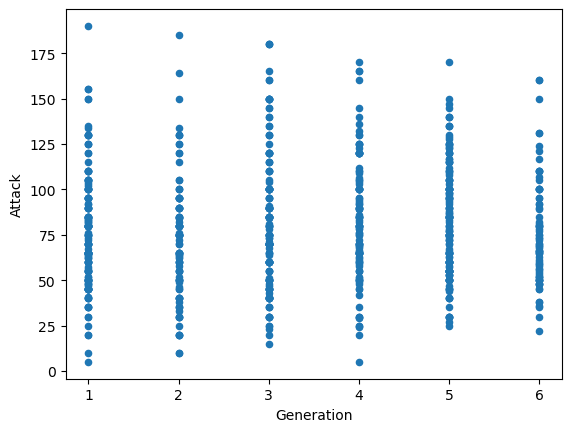

In [22]:
data.plot(kind="scatter", x="Generation", y="Attack")
plt.show()

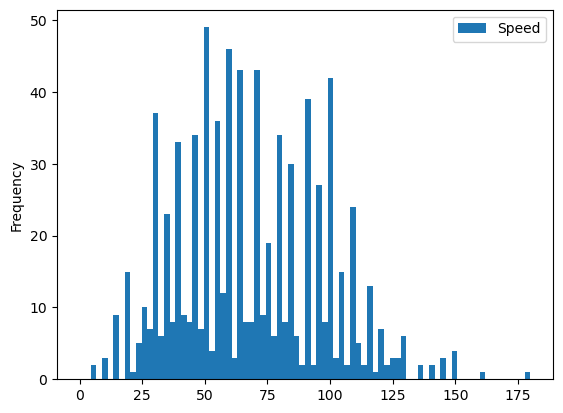

In [27]:
data.plot(kind="hist", y="Speed", bins=80, range=(0, 180))
plt.show()

In [35]:
import warnings
warnings.filterwarnings("ignore")

data2 = data.head()

date_list = ["1992-01-12", "1994-03-04", "1995-10-28", "1995-12-30", "2000-03-09"]
datetime_object = pd.to_datetime(date_list)

data2["date"] = datetime_object
data2 = data2.set_index("date")

data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-12,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1994-03-04,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1995-10-28,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1995-12-30,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
2000-03-09,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [38]:
print(data2.loc["2000-03-09"])
data2.loc["1995-10-28":"2000-03-09"]

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 2000-03-09 00:00:00, dtype: object


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1995-10-28,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1995-12-30,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
2000-03-09,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [39]:
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-31,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1995-12-31,3.5,80.0,91.0,103.0,111.0,110.0,80.0,1.0,0.0
1996-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,5.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.0


In [40]:
data2.resample("A").first().interpolate("linear")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-12-31,1.0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1993-12-31,1.5,None,None,None,52.5,55.5,56.0,72.5,72.5,52.5,1.0,0.0
1994-12-31,2.0,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1995-12-31,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1996-12-31,3.4,None,None,None,71.8,76.0,75.0,92.0,90.0,77.0,1.0,0.0
1997-12-31,3.8,None,None,None,63.6,70.0,67.0,84.0,80.0,74.0,1.0,0.0
1998-12-31,4.2,None,None,None,55.4,64.0,59.0,76.0,70.0,71.0,1.0,0.0
1999-12-31,4.6,None,None,None,47.2,58.0,51.0,68.0,60.0,68.0,1.0,0.0
2000-12-31,5.0,Charmander,Fire,None,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.0


In [41]:
data2.resample("A").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1993-12-31,1.5,52.5,55.5,56.0,72.5,72.5,52.5,1.0,0.0
1994-12-31,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1995-12-31,3.5,80.0,91.0,103.0,111.0,110.0,80.0,1.0,0.0
1996-12-31,3.8,71.8,83.2,91.0,100.8,98.0,77.0,1.0,0.0
1997-12-31,4.1,63.6,75.4,79.0,90.6,86.0,74.0,1.0,0.0
1998-12-31,4.4,55.4,67.6,67.0,80.4,74.0,71.0,1.0,0.0
1999-12-31,4.7,47.2,59.8,55.0,70.2,62.0,68.0,1.0,0.0
2000-12-31,5.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.0


In [42]:
data.HP.apply(lambda n: n/2)

0      22.5
1      30.0
2      40.0
3      40.0
4      19.5
       ... 
795    25.0
796    25.0
797    40.0
798    40.0
799    40.0
Name: HP, Length: 800, dtype: float64

In [44]:
data["total_pwr"] = data.Attack + data.Defense
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_pwr
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [48]:
typed_data = data.set_index(["Type 1", "Type 2"])
typed_data

#            Name  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1  Type 2                                                               
Grass   Poison    1       Bulbasaur  45      49       49       65       65   
        Poison    2         Ivysaur  60      62       63       80       80   
        Poison    3        Venusaur  80      82       83      100      100   
        Poison    4   Mega Venusaur  80     100      123      122      120   
Fire    NaN       5      Charmander  39      52       43       60       50   
...             ...             ...  ..     ...      ...      ...      ...   
Rock    Fairy   796         Diancie  50     100      150      100      150   
        Fairy   797    Mega Diancie  50     160      110      160      110   
Psychic Ghost   798  Hoopa Confined  80     110       60      150      130   
        Dark    799   Hoopa Unbound  80     160       60      170      130   
Fire    Water   800       Volcanion  80     110      120      130       90   

                Speed  Generation  Legendary  total_pwr  
Type 1  Type 2                                           
Grass   Poison     45           1      False         98  
        Poison     60           1      False        125  
        Poison     80           1      False        165  
        Poison     80           1      False        223  
Fire    NaN        65           1      False         95  
...               ...         ...        ...        ...  
Rock    Fairy      50           6       True        250  
        Fairy     110           6       True        270  
Psychic Ghost      70           6       True        170  
        Dark       80           6       True        220  
Fire    Water      70           6       True        230  

[800 rows x 11 columns]

# Pivoting

In [49]:
dict = {"treatment":["A","A","B","B"], "gender":["F","M","F","M"], "response":[10, 45, 5, 9], "age":[15,4,72,65]}
df = pd.DataFrame(dict)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [51]:
df.pivot(index="treatment", columns="gender", values=["response", "age"])

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [53]:
df1 = df.set_index(["treatment", "gender"])
df1

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [55]:
df1.unstack(level=0)

response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [56]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [58]:
df2 = df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


# Melting

In [60]:
pd.melt(df, id_vars=["treatment"], value_vars=["age", "response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


# Groupby

In [64]:
df.groupby("treatment").mean()

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [65]:
df.groupby("treatment").age.max()

treatment
A    15
B    72
Name: age, dtype: int64

In [66]:
df.groupby("treatment")[["age", "response"]].mean()

,age,response
treatment,,
A,9.5,27.5
B,68.5,7.0
